Looking at Big Trade Data:
Census International Trade Data


In [1]:
import datetime as dt
import numpy as np
import pandas as pd
import requests
import json
from pprint import pprint
import csv
import datetime
from pandas import Series

from pylab import rcParams
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', None)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat

# from api_key import api_key
from flask import Flask, jsonify, render_template


from flask_sqlalchemy import SQLAlchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import sqlalchemy

import os
import tensorflow as tf
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Loading up US Trade Data to database

In [2]:
engine = create_engine('sqlite:///./data/trade.sqlite')


In [3]:
Base = automap_base()
Base.prepare(engine, reflect=True)
session = Session(engine)

OperationalError: (sqlite3.OperationalError) unable to open database file

In [4]:
Imports = Base.classes.imports

In [5]:
api_key = "93ba5366cb39b249dcbde95cc4d461e7b05b747d"
access_key = "4f9566c06802ac93dbb7af423e88dd45"
export_url = (f"https://api.census.gov/data/timeseries/intltrade/exports")
import_url = (f"https://api.census.gov/data/timeseries/intltrade/imports")
china_code = "5700"
usa_code = "1000"
month = []
year = []

['imports']

Loading Import Table:


In [ ]:
total_import_by_commodity = requests.get(f"{import_url}/hs?get=CTY_CODE,CTY_NAME,I_COMMODITY,I_COMMODITY_SDESC,GEN_VAL_MO,GEN_VAL_YR&key={api_key}&time=from+2019-01&COMM_LVL=HS4").json()

In [ ]:
count = 1
cty_code = []
cty_name = []
commodity = []
movalue = []
yrvalue = []
period = []
desc = []
code = []
while count < 3460904:
    count += 1
    cty_code.append(total_import_by_commodity[count][0])
    cty_name.append(total_import_by_commodity[count][1])
    commodity.append(total_import_by_commodity[count][2])
    desc.append(total_import_by_commodity[count][3])
    movalue.append(total_import_by_commodity[count][4])
    yrvalue.append(total_import_by_commodity[count][5])
    period.append(total_import_by_commodity[count][6])
total_import_commodity = pd.DataFrame({"YTDValue" : yrvalue,
                          "Period" : period,
                          "Description" : desc,
                          "HSC": commodity,
                          "MoValue" : movalue,
                           "Country" : cty_name,
                           "CountryCode": cty_code})

In [ ]:
total_import_commodity.to_sql('total_country_imports', con=engine, if_exists='replace') 

Loading Export Table:

In [ ]:
total_export_by_commodity = requests.get(f"{export_url}/hs?get=CTY_CODE,CTY_NAME,E_COMMODITY,E_COMMODITY_SDESC,ALL_VAL_MO,ALL_VAL_YR&key={api_key}&time=from+2015-01&COMM_LVL=HS4").json()


In [6]:
results = session.query(Imports).statement
df = pd.read_sql_query(results, session.bind)

In [7]:
df = df.sort_values(by=["Period", "HSC"])

In [8]:
df.head()

,index,YTDValue,Period,Description,HSC,MoValue,Country,CountryCode
2161989,2161989,10500,2015-01,"HORSES, ASSES, MULES AND HINNIES, LIVE",0101,10500,OPEC,0001
2161990,2161990,38583160,2015-01,"HORSES, ASSES, MULES AND HINNIES, LIVE",0101,38583160,EUROPEAN UNION,0003
2161991,2161991,650000,2015-01,"HORSES, ASSES, MULES AND HINNIES, LIVE",0101,650000,PACIFIC RIM COUNTRIES,0014
2161992,2161992,23500,2015-01,"HORSES, ASSES, MULES AND HINNIES, LIVE",0101,23500,CAFTA-DR,0017
2161993,2161993,2854104,2015-01,"HORSES, ASSES, MULES AND HINNIES, LIVE",0101,2854104,NAFTA,0020


In [17]:
all_fx = pd.read_csv("https://s3.amazonaws.com/globefutures/fx/allfx.csv")


In [18]:
all_fx.describe()

,EUR/USD Close,USD/CHF Close,USD/CAD Close,EUR/JPY Close,AUD/USD Close,CHF/JPY Close,NZD/USD Close
count,5301.000000,5301.000000,5301.000000,5301.000000,5301.000000,5301.000000,5301.000000
mean,1.205649,3.748267,1.239828,129.047700,0.776361,97.398659,0.462792
std,0.167517,168.057391,0.188192,153.723506,0.149407,185.673199,0.358738
min,0.827600,0.718000,0.922900,0.612000,0.483800,59.240000,0.000000
25%,1.094700,0.967600,1.058800,114.975000,0.680200,83.200000,0.000000
50%,1.222200,1.084700,1.241000,128.930000,0.761230,89.710000,0.678510
75%,1.330300,1.308000,1.358400,136.290000,0.894400,108.750000,0.754100
max,1.599700,12231.000000,1.611600,11236.000000,1.101800,9629.000000,0.882200


In [162]:
y_fx = pd.DataFrame(all_fx["EUR/USD Close"])
y_fx.to_csv("y_all.csv")

In [163]:
all_fx.columns
import datetime

In [164]:
clean_fx = all_fx[['USD/CHF Close', 'USD/CAD Close',
       'EUR/JPY Close', 'AUD/USD Close', 'CHF/JPY Close']]
# clean_fx['Date'] = pd.to_datetime(clean_fx['Date'])


In [165]:
#dropping NZD/USD pair as it does not start until july 4 2006
series = clean_fx
X = series.values
train_size = int(len(X) * 0.66)
train, test = X[0:train_size], X[train_size:len(X)]
print('Observations: %d' % (len(X)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

Observations: 5301
Training Observations: 3498
Testing Observations: 1803


In [166]:
X_train_df = pd.DataFrame(train)
# X_train_df.to_csv("train_X.csv", index=False)


In [167]:
X_train = X_train_df.values

In [168]:
X_test_df = pd.DataFrame(test)
# X_test_df.to_csv("test_X.csv")

In [169]:
X_test = X_test_df.values

In [55]:
# Read the training data into a dataframe
# X_train_df = pd.read_csv(
#     X_training_data, delimiter=" ", skiprows=1, header=None)
# X_train_df.head()


In [11]:
X_train_df.head()

,0,1,2,3,4
0,1.3741,1.5340,133.27,0.6081,82.70
1,1.3671,1.5268,132.44,0.6210,81.93
2,1.3710,1.5148,130.91,0.6221,81.09
3,1.3952,1.5104,131.09,0.6299,81.00
4,1.3779,1.5127,129.94,0.6369,80.52


In [12]:
y_fx.head()

,EUR/USD Close
0,1.1729
1,1.1825
2,1.1776
3,1.1600
4,1.1713


In [171]:
yseries = y_fx
y = yseries.values
train_size = int(len(y) * 0.66)
train, test = y[0:train_size], y[train_size:len(y)]
# print('Observations: %d' % (len(y)))
# print('Training Observations: %d' % (len(train)))
# print('Testing Observations: %d' % (len(test)))

In [172]:
y

array([[1.1729],
       [1.1825],
       [1.1776],
       ...,
       [1.1146],
       [1.113 ],
       [1.1152]])

In [173]:
# Read the testing labels
y_test_df = pd.DataFrame(test)
y_test = y_test_df
# y_test_df = pd.to_numeric(y_test_df[0], downcast='float')
# One-hot encode the integer labels
# y_test = to_categorical(y_test_df)
# y_test.shape

y_train_df =  pd.DataFrame(train)
y_train = y_train_df
# y_train_df = pd.to_numeric(y_train_df[0], downcast='float')
# One-hot encode the integer labels
# y_train = to_categorical(y_train_df)
# y_train.shape


In [61]:
# Read in the training labels as a dataframe
# y_train_df = pd.read_csv("train_Y.csv")

# One-hot encode the integer labels
# 1 WALKING
# 2 WALKING_UPSTAIRS
# 3 WALKING_DOWNSTAIRS
# 4 SITTING
# 5 STANDING
# 6 LAYING
# 7 STAND_TO_SIT
# 8 SIT_TO_STAND
# 9 SIT_TO_LIE
# 10 LIE_TO_SIT
# 11 STAND_TO_LIE
# 12 LIE_TO_STAND

# y_train = to_categorical(y_train_df)


In [15]:
# Read the testing data

X_test = X_test_df.values
X_test.shape

(1803, 5)

In [16]:
y_test.shape

NameError: name 'y_test' is not defined

Make the DNN

In [111]:
model = Sequential()

In [112]:
# Add the first layer where the input dimensions are the 561 columns of the training data
model.add(Dense(100, activation='relu', input_dim=X_train.shape[0]))

In [113]:
model.add(Dense(3498, activation='relu'))

In [114]:
y_train.shape

(3498, 2)

In [115]:
model.compile(loss="categorical_crossentropy",
              optimizer="adam", metrics=['accuracy'])

In [116]:
model.fit(
    X_train,
    y_train,
    epochs=100,
    shuffle=True,
    verbose=1
)

ValueError: Error when checking input: expected dense_5_input to have shape (3498,) but got array with shape (5,)

In [9]:
import quandl
api_key = "UsfRGqgPwyUD52rUKrRu"



XGBOOST TIME

In [25]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
import imageio
import os
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.model_selection import train_test_split

In [26]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [48]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [174]:
reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 1, n_estimators = 10000)
reg.fit(X_train, y_train,) # Change verbose to True if you want to see it train
#  eval_set=[(X_train, y_train), (X_test, y_test)],
#         early_stopping_rounds=50, #stop if 50 consequent rounds without decrease of error
#         verbose=False

XGBRegressor(alpha=1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=10000, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [175]:
preds = reg.predict(X_test)
len(preds)


1803

In [176]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print(rmse)

0.25011524536116825


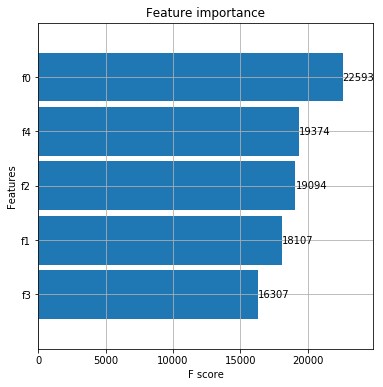

In [177]:
xgb.plot_importance(reg, height=0.9)

In [36]:
X_train_df.head()

,0,1,2,3,4
0,1.3741,1.5340,133.27,0.6081,82.70
1,1.3671,1.5268,132.44,0.6210,81.93
2,1.3710,1.5148,130.91,0.6221,81.09
3,1.3952,1.5104,131.09,0.6299,81.00
4,1.3779,1.5127,129.94,0.6369,80.52


In [38]:
clean_fx.head()

,USD/CHF Close,USD/CAD Close,EUR/JPY Close,AUD/USD Close,CHF/JPY Close
0,1.3741,1.5340,133.27,0.6081,82.70
1,1.3671,1.5268,132.44,0.6210,81.93
2,1.3710,1.5148,130.91,0.6221,81.09
3,1.3952,1.5104,131.09,0.6299,81.00
4,1.3779,1.5127,129.94,0.6369,80.52


In [115]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=15,
                    num_boost_round=500,early_stopping_rounds=100,metrics="rmse", as_pandas=True, seed=123)

In [116]:
cv_results.head()


,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.655374,0.000489,0.655331,0.007346
1,0.592516,0.000990,0.592560,0.006798
2,0.535636,0.001040,0.535653,0.006438
3,0.484615,0.000834,0.484759,0.006527
4,0.438731,0.000958,0.438833,0.006017


In [117]:
print((cv_results["test-rmse-mean"]).tail(1))


499    0.044357
Name: test-rmse-mean, dtype: float64


In [114]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)


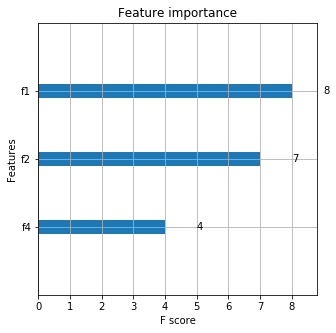

In [62]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [6, 6]
plt.show()

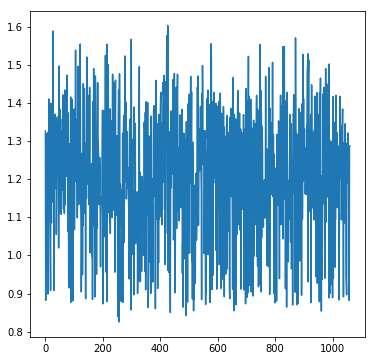

In [143]:
plt.plot(preds)
plt.show()

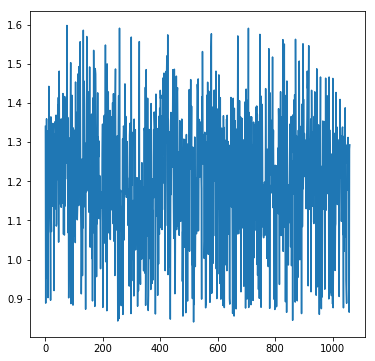

In [160]:
plt.plot(y_test)
plt.show()

In [161]:
y_test

array([[1.3412],
       [0.8883],
       [1.2198],
       ...,
       [0.8651],
       [1.2832],
       [1.2938]])

In [136]:
pd.DataFrame.plot(cv_results["test-rmse-std"])
plt.show()

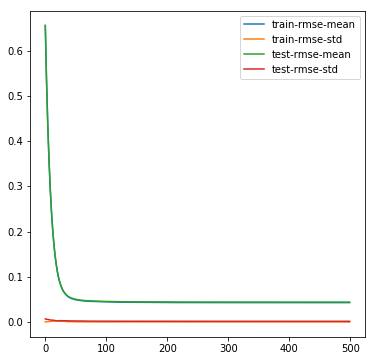

In [137]:
cv_results.plot()